Stats descriptives des bases de données pour une première analyse

1) Importation des bases que l'on va utiliser

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Importer 3 bases CSV
df_voit = pd.read_csv("../Bases/q_voitvul_public_V3.csv", delimiter=";",encoding="ISO-8859-1")  # Modifie le délimiteur si nécessaire
df_tcmmen = pd.read_csv("../Bases/tcm_men_public_V3.csv", delimiter=",",encoding="ISO-8859-1")  # Modifie le délimiteur si nécessaire
df_men = pd.read_csv("../Bases/q_menage_public_V3.csv", delimiter=";",encoding="ISO-8859-1")  # Modifie le délimiteur si nécessaire

# Importer la base Excel
df_excel = pd.read_excel("../Bases/parc_vp_region_2024_1.xlsx", engine="openpyxl")  # Spécifie openpyxl pour les fichiers .xlsx
print(df_excel.head())  # Affiche les 5 premières lignes
#excel petit soucis à regler pour l'ouverture

/tmp/ipykernel_101913/4049038798.py:6: DtypeWarning: Columns (63) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tcmmen = pd.read_csv("../Bases/tcm_men_public_V3.csv", delimiter=",",encoding="ISO-8859-1")  # Modifie le délimiteur si nécessaire


  Parc par région des voitures particulières au 1er janvier, selon le carburant, l'âge, le statut, la vignette crit'air  \
0                              Source : SDES, Rsvero                                                                      
1                                                NaN                                                                      
2                                Région de résidence                                                                      
3                                           Inconnue                                                                      
4                                           Inconnue                                                                      

                 Unnamed: 1                       Unnamed: 2 Unnamed: 3  \
0                       NaN                              NaN        NaN   
1                       NaN                              NaN        NaN   
2  Code région de résidence         

      IDENT_NUMVEH      IDENT_MEN  NUM_VEH     pond_veh  KVROUL  \
0  110000011400001  1100000114000        1  1842.977077       1   
1  110000011500001  1100000115000        1  1948.382441       1   
2  110000011500002  1100000115000        2  1948.382441       1   
3  110000011600001  1100000116000        1   833.453670       1   
4  110000012400001  1100000124000        1  1698.142782       1   

   cylindree_fin energie_fin  energie_agrege hybride  energie_statinfo  ...  \
0            1.6          ES             1.0     NaN               2.0  ...   
1            1.6          GO             2.0     NaN               4.0  ...   
2            1.4          ES             1.0     NaN               2.0  ...   
3            1.6          ES             1.0     NaN               2.0  ...   
4            1.5          GO             2.0     NaN               4.0  ...   

   KVKMVT      KVKM1ANV  indic_km_annu_corr KVKM1ANVT  KVCONS KVGAREJOUR  \
0     4.0   2478.916193             INTERPO   

2. Analyse des bases chargées  
2.1 Analyse de la base VoitVul : 

In [9]:
#Affiche table voiturevul
print(df_voit.head())  # Affiche les 5 premières lignes

      IDENT_NUMVEH      IDENT_MEN  NUM_VEH     pond_veh  KVROUL  \
0  110000011400001  1100000114000        1  1842.977077       1   
1  110000011500001  1100000115000        1  1948.382441       1   
2  110000011500002  1100000115000        2  1948.382441       1   
3  110000011600001  1100000116000        1   833.453670       1   
4  110000012400001  1100000124000        1  1698.142782       1   

   cylindree_fin energie_fin  energie_agrege hybride  energie_statinfo  ...  \
0            1.6          ES             1.0     NaN               2.0  ...   
1            1.6          GO             2.0     NaN               4.0  ...   
2            1.4          ES             1.0     NaN               2.0  ...   
3            1.6          ES             1.0     NaN               2.0  ...   
4            1.5          GO             2.0     NaN               4.0  ...   

       KVKM1ANV indic_km_annu_corr  KVKM1ANVT KVCONS  KVGAREJOUR KVGARENUIT  \
0   2478.916193            INTERPO        1

In [21]:
#Convertir les variables identifiants voitures et ménages en string
df_voit[["IDENT_NUMVEH", "IDENT_MEN"]] = df_voit[["IDENT_NUMVEH", "IDENT_MEN"]].astype(str)
#Création de nouvelles variables energies 
df_voit["energie_groupe"] = df_voit["energie_agrege"].apply(lambda x: 
                                           "Thermique" if x in [1, 2] else 
                                           "Electrique" if x == 5  else 
                                           "Hybride" if x == 4 else 
                                           "Autres")

df_voit["energie_cartegrise"] = df_voit["energie_fin"].apply(lambda x: 
                                           "Gazole" if x  == "GO" else 
                                           "Essence" if x == "ES"  else 
                                           "Hybride" if x in ["EE","EH","GH"] else 
                                           "Electrique" if x == "EL" else
                                           "Autres")
print(df_voit.columns) #permet d'avoir le nom des variables

Index(['IDENT_NUMVEH', 'IDENT_MEN', 'NUM_VEH', 'pond_veh', 'KVROUL',
       'cylindree_fin', 'energie_fin', 'energie_agrege', 'hybride',
       'energie_statinfo', 'energie_CritAir', 'critair', 'puis_fisc_fin',
       'ANNEE_1mec', 'age', 'ANNEE_acq', 'dur_acq', 'KVAQUIV', 'KVAQUINO01',
       'KVAQUINO02', 'KVAQUINO03', 'KVAQUINO04', 'KVAQUINO05', 'KVAQUINO06',
       'KVAQUINO07', 'KVAQUINO08', 'KVAQUINO09', 'KVAQUINO10', 'KVAQUINO11',
       'KVAQUINO12', 'KVAQUINO13', 'KVAQUINO14', 'KVAQUINO15', 'KVAQUINO16',
       'KVAQUINO17', 'KVAQUINO18', 'KVAQUINO19', 'KVAQUINO20', 'KVAQUINO21',
       'KVQUICONV01', 'KVQUICONV02', 'KVQUICONV03', 'KVQUICONV04',
       'KVQUICONV05', 'KVQUICONV06', 'KVQUICONV07', 'KVQUICONV08',
       'KVQUICONV09', 'KVQUICONV10', 'KVQUICONV11', 'KVQUICONV12',
       'KVQUICONV13', 'KVQUICONV14', 'KVQUICONV15', 'KVQUICONV16',
       'KVQUICONV17', 'KVQUICONV18', 'KVQUICONV19', 'KVQUICONV20',
       'KVQUICONV21', 'KVQUI9COV', 'KVQUICONPV', 'KVKMV', 'indic_km_c

In [ ]:
#Statistiques sur les variables quantitatives KM sur les 12 derniers mois et la conso au 100 km
df_voit[["KVKM1ANV","KVCONS"]].rename(columns={"KVKM1ANV": "Km12derniersmois","KVCONS": "Conso100KM"}).describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99])


,Km12derniersmois,Conso100KM
count,18472.000000,18642.000000
mean,11261.895063,2309.270191
std,8119.898687,4208.130321
min,0.000000,0.000000
1%,335.885945,4.000000
25%,5711.375318,5.800000
50%,10241.232997,7.000000
75%,15331.011307,10.500000
99%,35000.000000,9999.000000
max,151260.830720,9999.000000


Statistiques sur les variables qualitatives pour voir comment la structure et le type d'individu de la base


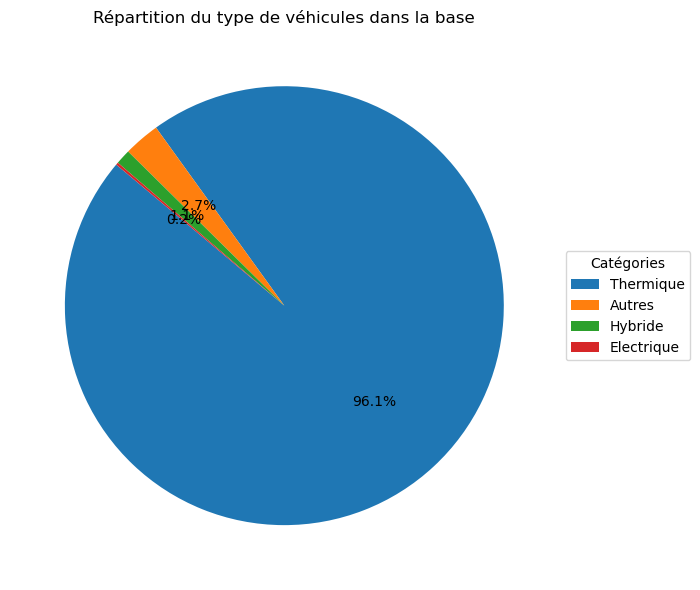

In [ ]:
# Compter les fréquences de chaque type d'énergie
frequences = df_voit["energie_groupe"].value_counts()

# Créer le camembert sans les étiquettes (labels)
plt.figure(figsize=(8, 6))
plt.pie(frequences, autopct='%1.1f%%', startangle=140)

# Ajouter la légende à côté
plt.legend(frequences.index, title="Catégories", loc="center left", bbox_to_anchor=(1, 0.5))

plt.title("Répartition du type de véhicules dans la base")
plt.tight_layout()  # Ajuste automatiquement l'espace pour éviter les chevauchements
plt.show()

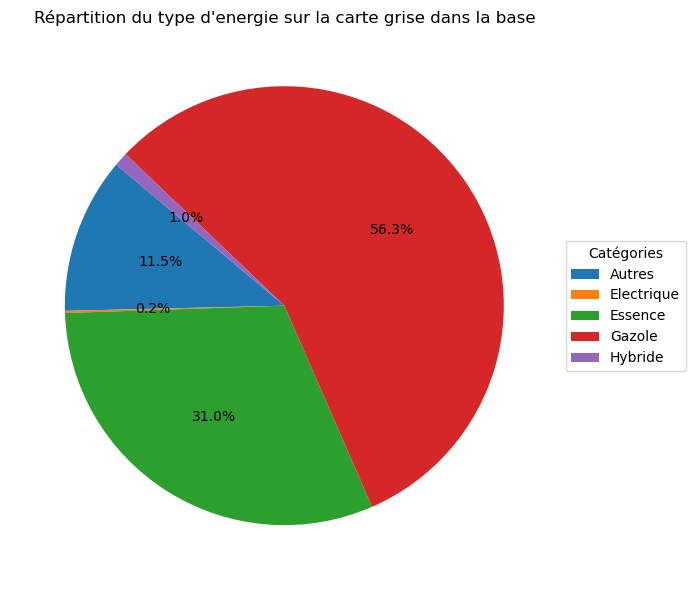

In [22]:
# Compter les fréquences de chaque energie carte Grise
frequences = df_voit["energie_cartegrise"].value_counts()
frequences = frequences.sort_index()
# Créer le camembert sans les étiquettes (labels)
plt.figure(figsize=(8, 6))
plt.pie(frequences, autopct='%1.1f%%', startangle=140)

# Ajouter la légende à côté
plt.legend(frequences.index, title="Catégories", loc="center left", bbox_to_anchor=(1, 0.5))

plt.title("Répartition du type d'energie sur la carte grise dans la base")
plt.tight_layout()  # Ajuste automatiquement l'espace pour éviter les chevauchements
plt.show()

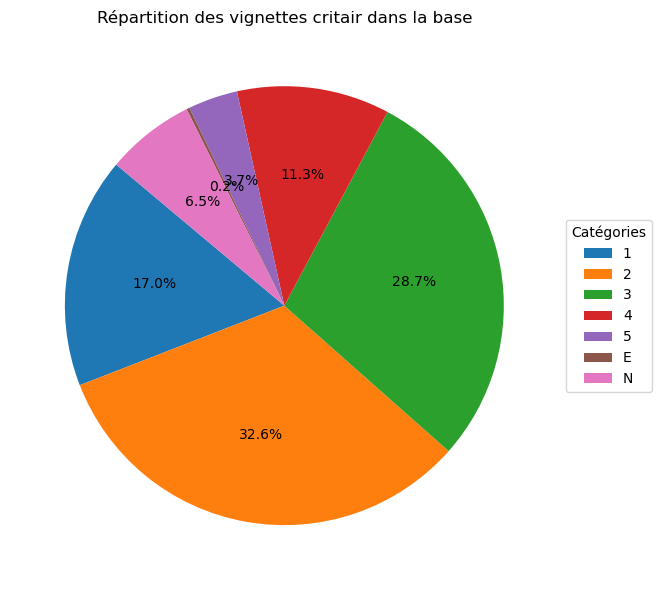

In [19]:
# Compter les fréquences de chaque crit'air
frequences = df_voit["critair"].value_counts()
frequences = frequences.sort_index()
# Créer le camembert sans les étiquettes (labels)
plt.figure(figsize=(8, 6))
plt.pie(frequences, autopct='%1.1f%%', startangle=140)

# Ajouter la légende à côté
plt.legend(frequences.index, title="Catégories", loc="center left", bbox_to_anchor=(1, 0.5))

plt.title("Répartition des vignettes critair dans la base")
plt.tight_layout()  # Ajuste automatiquement l'espace pour éviter les chevauchements
plt.show()

Après avoir présenter les caractéristiques générales des véhicules, on fait essayer de relier le kilométrage avec les caractéristiques des vehicules (energie, critair, cartegrise...)

    2.2 Analyse de la base tcm_men : 

In [5]:
#Affiche table tcm_menage
print(df_tcmmen.head())

       ident_men     ident_log  vague_enq  BS    pond_menC  NPERS  NCOUPLES  \
0  1100000114000  110000011400          1   0  1842.977077      1         0   
1  1100000115000  110000011500          1   0  1948.382441      4         1   
2  1100000116000  110000011600          1   0   833.453670      2         1   
3  1100000124000  110000012400          2   0  1698.142782      2         1   
4  1100000125000  110000012500          2   0  1994.633496      2         1   

   NENFANTS  NACTIFS  NENFACT  ...  pop_10min_pieton_train_res  \
0         0        0        0  ...                          80   
1         2        2        0  ...                          80   
2         0        0        0  ...                           0   
3         0        2        0  ...                          50   
4         0        1        0  ...                          50   

   pop_10min_voiture_tram_metro_res  pop_10min_voiture_train_res  \
0                                 0                         

In [15]:
#Convertir les variables identifiants voitures et ménages en string
df_tcmmen[["ident_log", "ident_men"]] = df_tcmmen[["ident_log", "ident_men"]].astype(str)


In [22]:
#Vérifier que la somme des pondérations des ménages vaut le nombre total de ménages en France
tot_pond_menC=df_tcmmen[["pond_menC"]].sum()
print(tot_pond_menC)

#Nombre moyen de personnes dans un ménage
moy_NPERS=df_tcmmen[["NPERS"]].mean()
print(moy_NPERS)


pond_menC    2.925310e+07
dtype: float64
NPERS    2.292007
dtype: float64


In [32]:
#Type de ménage au sens du TCM : "TYPMEN5",
#Diplôme le plus élevé de la PR (code regroupé) : "DIPDETPR",
#Catégorie socioprofessionnelle du ménage : "CSMEN",
#Département de résidence : "DEP_RES",
#Région de la commune de résidence : "REG_res"
#variables de localisation...

nom_col_quanti=["quartile_rev","decile_rev"]

for col in nom_col_quanti :
    print("Résumé statistique pour la variable", col)
    print(df_tcmmen[col].describe())
    
print(df_tcmmen["quartile_rev"].head())


Résumé statistique pour la variable quartile_rev
count    13825.000000
mean         2.612658
std          1.115079
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          4.000000
Name: quartile_rev, dtype: float64
Résumé statistique pour la variable decile_rev
count    13825.000000
mean         5.750741
std          2.872370
min          1.000000
25%          3.000000
50%          6.000000
75%          8.000000
max         10.000000
Name: decile_rev, dtype: float64
0    3
1    4
2    2
3    4
4    3
Name: quartile_rev, dtype: int64


    2.3 Analyse de la base men : 

In [6]:
#Affiche table q_menage
print(df_men.head())

       IDENT_MEN    pond_menC  JNBVEH  JNBVHS  JNBVPHS  JNBCCHS  JNBVULHS  \
0  1100000114000  1842.977077       1     2.0      NaN      NaN       NaN   
1  1100000115000  1948.382441       2     2.0      NaN      NaN       NaN   
2  1100000116000   833.453670       1     2.0      NaN      NaN       NaN   
3  1100000124000  1698.142782       1     2.0      NaN      NaN       NaN   
4  1100000125000  1994.633496       2     2.0      NaN      NaN       NaN   

   JNBMOTO  JNBCYCLO  JNBAUTVEH  ...  JUTILMOTO  JUTILCYCLO  JUTILAUTVEH  \
0        0         0          0  ...        NaN         NaN          NaN   
1        0         0          0  ...        NaN         NaN          NaN   
2        0         0          0  ...        NaN         NaN          NaN   
3        2         0          0  ...        2.0         NaN          NaN   
4        0         0          0  ...        NaN         NaN          NaN   

   JUTILVELOAD  JUTILVELOENF  JVOLVELO  JPLUSVELO  JNBKVM  JUTIL2RM  BLOGDIST  
